In [1]:
# Note to self - to install a package globally, pip install it,
# then run jupyter notebook again

'''
Kelly Criterion
Expected Value of Game = (Probability(Win) - Probability(Loss)) * Size of Bet > 0

The available capital after n rounds of game is:
c(n) = c(0) * (1+f)^h - (1+f)^t
where
c(n) = capital at round n
h = probability of win
t = probability of loss 
f = fraction of capital to commit

So the closed form log-return maximization problem becomes:
r(g) = (h/n) * log(1+f) + (t/n) * log(1+f)
i.e. the sum of the product winning probability divided by the number of trials and the product of 
the losing probability divided by the number of trials

So the f term is the maximization of the expected value of the rate of growth, which is the function G(f)
E[h] = n * p
E[t] = n * q

Then 
E[r^g] = p * log(1+f) + q * log(1+f)
= G(f)

Taking the first derivative of G(f):
G'(f) = (p/1+f) - (q/1+f)
= (p - pf - q - qf)/((1+f)*(1-f))
= (p - q - f)/ ((1+f)*(1-f))
or the quotient of (trails * win fraction) - (trails * loss fraction) - (fraction) and the product (1 + fraction)
and (1 - fraction)

so finally the optimal fraction is:
f(n) = p - q
REAL NUMBER TIME!
If win chance = 55 &
lose change = 45
55 - 45 = 10, so invest 10% of capital per bet,

of course, constraining for max position size in any given security

Let's do it in code:
'''

"\nKelly Criterion\nExpected Value of Game = (Probability(Win) - Probability(Loss)) * Size of Bet > 0\n\nThe available capital after n rounds of game is:\nc(n) = c(0) * (1+f)^h - (1+f)^t\nwhere\nc(n) = capital at round n\nh = probability of win\nt = probability of loss \nf = fraction of capital to commit\n\nSo the closed form log-return maximization problem becomes:\nr(g) = (h/n) * log(1+f) + (t/n) * log(1+f)\ni.e. the sum of the product winning probability divided by the number of trials and the product of \nthe losing probability divided by the number of trials\n\nSo the f term is the maximization of the expected value of the rate of growth, which is the function G(f)\nE[h] = n * p\nE[t] = n * q\n\nThen \nE[r^g] = p * log(1+f) + q * log(1+f)\n= G(f)\n\nTaking the first derivative of G(f):\nG'(f) = (p/1+f) - (q/1+f)\n= (p - pf - q - qf)/((1+f)*(1-f))\n= (p - q - f)/ ((1+f)*(1-f))\nor the quotient of (trails * win fraction) - (trails * loss fraction) - (fraction) and the product (1 + f

In [5]:

import math
import time
import numpy as np
import pandas as pd
import datetime as dt
import cufflinks as cf
from pylab import plt

In [6]:
np.random.seed(1000)
plt.style.use('seaborn')
%matplotlib inline

In [7]:
# Monte Carlo time!
p = 0.55
f = p  - (1 - p) # has to add to 1

In [8]:
f

0.10000000000000009

In [53]:
I = 50 # trials
n = 50 # bets per trial

In [49]:
def run_simulation(f):
    c = np.zeros((n, I)) # zeros matrix surface n = rows I = columns
    c[0] = 100 # initial capital is par
    for i in range(I):
        for t in range(1, n):
            o = np.random.binomial(1, p) # digitize the wins/losses against the probability of win
            if o > 0:
                c[t, i] = (1 + f) * c[t-1, i] # winrar
            else:
                c[t, i] = (1-f) * c[t-1, i] # loss
    return c

In [54]:
c_1 = run_simulation(f)

In [55]:
c_1.round(2)

array([[100.  , 100.  , 100.  , ..., 100.  , 100.  , 100.  ],
       [ 90.  , 110.  ,  90.  , ...,  90.  ,  90.  ,  90.  ],
       [ 99.  ,  99.  ,  99.  , ...,  99.  ,  99.  ,  81.  ],
       ...,
       [194.81,  87.3 , 106.7 , ..., 194.81,  21.43,  11.74],
       [175.33,  96.03,  96.03, ..., 214.29,  19.28,  12.91],
       [192.86,  86.42,  86.42, ..., 192.86,  21.21,  14.2 ]])

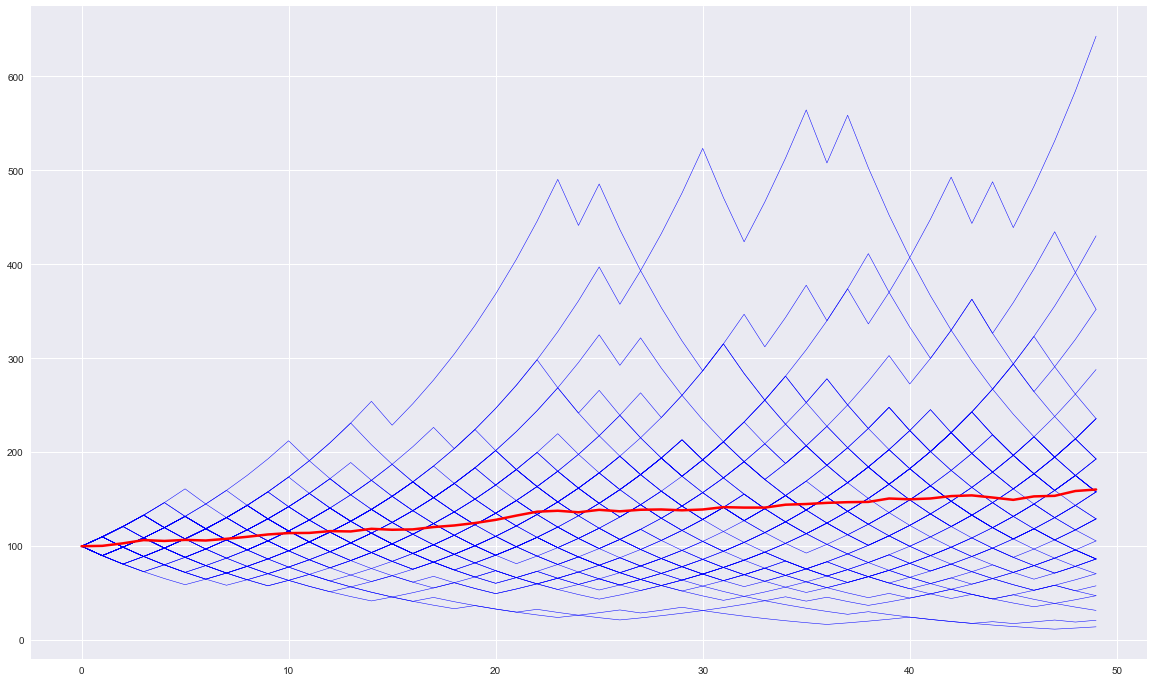

In [56]:
plt.figure(figsize=(20,12))
plt.plot(c_1, 'b', lw=0.5)
plt.plot(c_1.mean(axis=1), 'r', lw=2.5);

In [57]:
c_2 = run_simulation(0.05)

In [58]:
c_3 = run_simulation(0.25)

In [59]:
c_4 = run_simulation(0.5)

In [ ]:
plt.figure(figsize=(20,12))
